In [1]:
# importing libraries
import pandas as pd
import pandasql as psql

# for vizualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading datasets

emails_sent = pd.read_excel('Emails sent.xlsx')
fines = pd.read_csv('Fines paid  by doctors.csv')

In [3]:
# looking at each dataset 

emails_sent.head() 

,name_last,name_first,name_middle,mail_sent_date,office
0,ADELGLASS,JEFFREY,M.,2009-05-22 00:00:00,Center for Drug Evaluation and Research
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health


In [4]:
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",$-
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",$-
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,$448.00
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,$119.00
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",$-


# Data Cleaning and Preprocessing

## Task -1 Standardise the mail_sent_date column values to YYYY-MM-DD standard date format

In [5]:
emails_sent['mail_sent_date_new'] = pd.to_datetime(emails_sent.mail_sent_date)

In [6]:
# checking 

emails_sent.head(20)

,name_last,name_first,name_middle,mail_sent_date,office,mail_sent_date_new
0,ADELGLASS,JEFFREY,M.,2009-05-22 00:00:00,Center for Drug Evaluation and Research,2009-05-22
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research,2010-04-17
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health,2012-01-26
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research,2014-11-15
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health,2014-07-17
5,ANDERSON,C.,JOSEPH,2010-02-22,Center for Devices and Radiological Health,2010-02-22
6,ANDREWS,DAVID,W.,2010-07-17,Center for Biologics Evaluation and Research,2010-07-17
7,AQEL,RAED,NaN,2012-10-27,Center for Devices and Radiological Health,2012-10-27
8,ARROWSMITH,PETER,N.,2014.01.18,Center for Devices and Radiological Health,2014-01-18
9,BARR,JOHN,D.,2010-01-11,Center for Devices and Radiological Health,2010-01-11


In [7]:
# taking out the year column

emails_sent['Year'] = emails_sent.mail_sent_date_new.dt.year

In [8]:
# checking

emails_sent.head()

,name_last,name_first,name_middle,mail_sent_date,office,mail_sent_date_new,Year
0,ADELGLASS,JEFFREY,M.,2009-05-22 00:00:00,Center for Drug Evaluation and Research,2009-05-22,2009
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research,2010-04-17,2010
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health,2012-01-26,2012
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research,2014-11-15,2014
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health,2014-07-17,2014


In [9]:
# adding name (full name) column in emails_sent

full_name = emails_sent.name_first.str.strip() + " " + emails_sent.name_last.str.strip()
full_name = full_name.to_list()
emails_sent['Name'] = full_name

# checking
emails_sent.head()

,name_last,name_first,name_middle,mail_sent_date,office,mail_sent_date_new,Year,Name
0,ADELGLASS,JEFFREY,M.,2009-05-22 00:00:00,Center for Drug Evaluation and Research,2009-05-22,2009,JEFFREY ADELGLASS
1,ADKINSON,N.,FRANKLIN,2010-04-17,Center for Biologics Evaluation and Research,2010-04-17,2010,N. ADKINSON
2,ALLEN,MARK,S.,2012-01-26,Center for Devices and Radiological Health,2012-01-26,2012,MARK ALLEN
3,AMSTERDAM,DANIEL,NaN,2014.11.15,Center for Biologics Evaluation and Research,2014-11-15,2014,DANIEL AMSTERDAM
4,AMSTUTZ,HARLAN,C.,2014.07.17,Center for Devices and Radiological Health,2014-07-17,2014,HARLAN AMSTUTZ


In [10]:
# this time adding name (full name) column in fines

full_name_2 = fines.first_name.str.strip() + " " + fines.last_name.str.strip()
fines['Name'] = full_name_2

# checking
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,Name
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",$-,STEVEN DEITELZWEIG
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",$-,AAKASH AHUJA
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,$448.00,LILIAN ABBO
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,$119.00,LILIAN ABBO
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",$-,LILIAN ABBO


In [11]:
# correcting cash_fine column and adding its corrected version to the table without removing the original
# cf implies cash_fine

cf = fines[' cash_fine '].str.strip('$').str.strip().str.replace(',', '')
cf = cf.replace('$-', 0)
cf = cf.replace('NA', 0)
cf = cf.astype(float)

fines['Cash_fine_in_$'] = cf

In [12]:
# now doing same with online_fine; of implies online_fines

of = fines[' online_fine '].str.strip('$').str.strip().str.replace(',', '')
of = of.replace('$-', 0)
of = of.replace('NA', 0)
of = of.astype(float)

fines['Online_fine_in_$'] = of

In [13]:
# creating a total_fine column; tf implies total_fine

tf = cf + of
fines['Total_fine_in_$'] = tf

# checking for all 3 cloumns
fines.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,Name,Cash_fine_in_$,Online_fine_in_$,Total_fine_in_$
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,"$2,625.00",$-,STEVEN DEITELZWEIG,2625.0,0.0,2625.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,"$1,000.00",$-,AAKASH AHUJA,1000.0,0.0,1000.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,$-,$448.00,LILIAN ABBO,0.0,448.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,$-,$119.00,LILIAN ABBO,0.0,119.0,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,"$1,800.00",$-,LILIAN ABBO,1800.0,0.0,1800.0


## Cleaning and Preprocessing done

## Now performing remaining tasks

## Task -2 In which Year maximum number of emails were sent to doctors? 

In [14]:
q1 = """Select count(*) as no_of_mails, Year from emails_sent group by Year"""
op2 = psql.sqldf(q1)

op2

,no_of_mails,Year
0,1,2006
1,15,2007
2,8,2008
3,14,2009
4,25,2010
5,20,2011
6,16,2012
7,21,2013
8,32,2014
9,31,2015


### Maximum number of emails were sent to doctors in 2014 and the count was 32

## Task - 3 Write a query to get total fine paid per Office

In [15]:
q2="""Select sum(Total_fine_in_$) as cumulative_total_fine, office from fines left join emails_sent 
      on emails_sent.Name =fines.Name group by office"""
op3 = psql.sqldf(q2)

op3

,cumulative_total_fine,office
0,35254403.0,None
1,2896.0,Center for Biologics Evaluation and Research
2,31309.0,Center for Devices and Radiological Health
3,103767.0,Center for Drug Evaluation and Research


## Task - 4 Write a query to get the highest total fine and lowest total fine paid per state

In [16]:
q3 = """ select min(Total_fine_in_$) as min_total_fine, max(Total_fine_in_$) as max_total_fine, state 
         from fines group by state"""
op4 = psql.sqldf(q3)

op4

,min_total_fine,max_total_fine,state
0,1750.0,1750.0,AK
1,26.0,232991.0,AL
2,26.0,77670.0,AR
3,26.0,151642.0,AZ
4,25.0,323122.0,CA
5,31.0,282565.0,CO
6,25.0,132853.0,CT
7,25.0,62000.0,DC
8,36.0,19750.0,DE
9,25.0,1185466.0,FL


## Task - 5 Write a query to get the least 2 states that had to pay minimum 'online' fine 

In [17]:
q4 = """Select state, min(Online_fine_in_$) as min_fine from fines group by state order by min_fine DESC LIMIT 2"""
op5 = psql.sqldf(q4)

op5

,state,min_fine
0,WY,0.0
1,WV,0.0


#### Although I have used DESC here to get the minimum  online fine for least 2 states but it will not make much of a diffrence as there are other states which also have 0 as their online fine

## Task - 6 Write a SQL query to find the number of doctors that contributed to the state having highest 'cash' fine

#### I didn't get this question as there is no column that depict that a doctor has contributed/donated an entity or money to the state.

## Task - 7 Get the top 5 average fine paid per state and category

In [18]:
q5 = """ SELECT AVG(Total_fine_in_$) AS fines, state, category FROM fines GROUP BY state, category ORDER BY fines LIMIT 5 """
op7 = psql.sqldf(q5)

op7

,fines,state,category
0,0.000000,NC,None
1,31.000000,NC,Educational Items
2,47.000000,MN,Educational Items
3,49.285714,MS,Educational Items
4,54.166667,TN,Educational Items


## Viszualizations

### Total fines per category

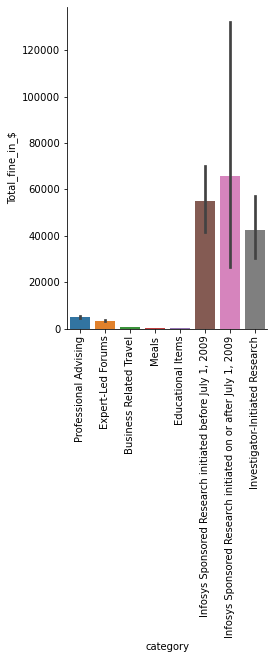

In [19]:
p1 = sns.catplot(x = 'category', y = 'Total_fine_in_$', data = fines, kind = 'bar')
p1.set_xticklabels(rotation=90)

##### Not only does the Infosys Sponsored Reasearch (after july 1, 2009) has highest total fine it also has highest deviation

### Total fine per state

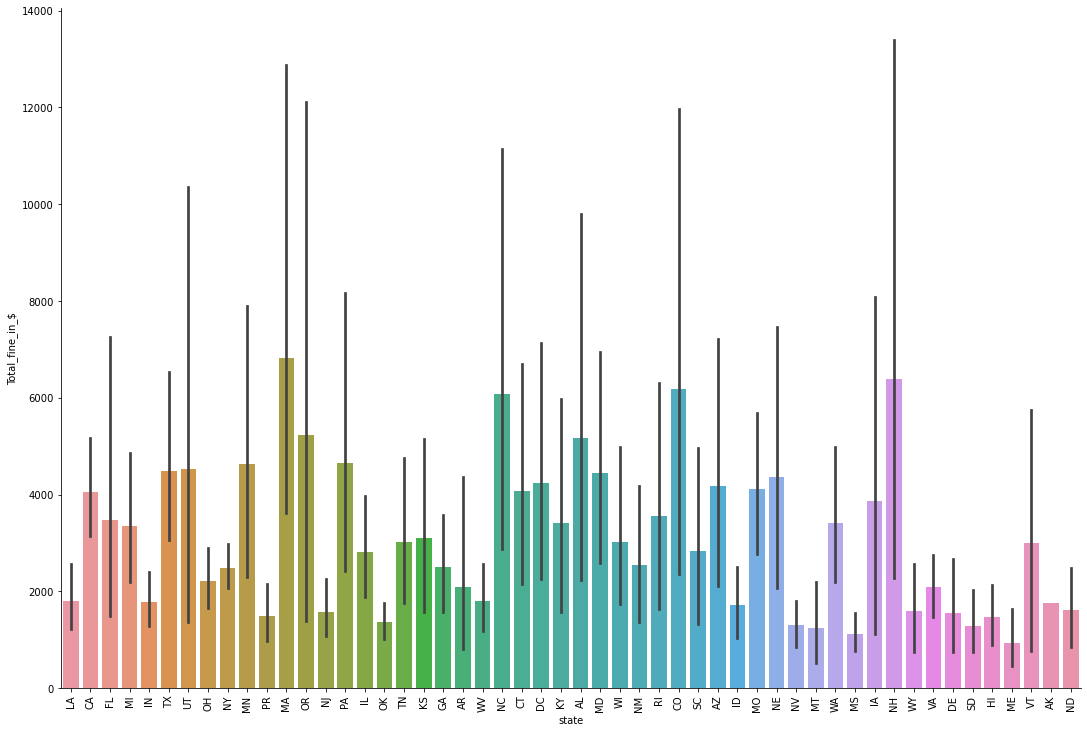

In [20]:
p2 = sns.catplot(x = 'state', y = 'Total_fine_in_$', data = fines, kind = 'bar', height=10, aspect=15/10)
p2.set_xticklabels(rotation=90)

#### In states MA and NH have highest total fine while OR shows the highest deviation

### Online fines per category

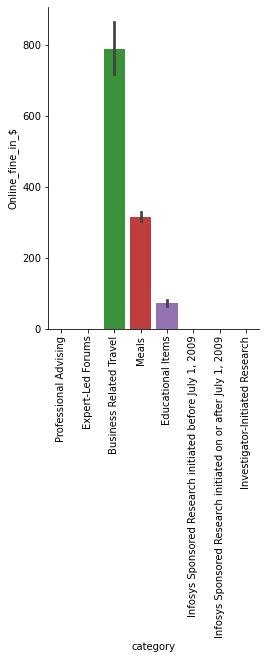

In [21]:
p3 = sns.catplot(x = 'category', y = 'Online_fine_in_$', data = fines, kind = 'bar')
p3.set_xticklabels(rotation=90)

#### Online fines shows an opposite trend as compared to Total fines the major insight here is that Researches, Advising and forums have nil online fines. Travel have highest fine and Education Interns have lowest.

### Online fine per state

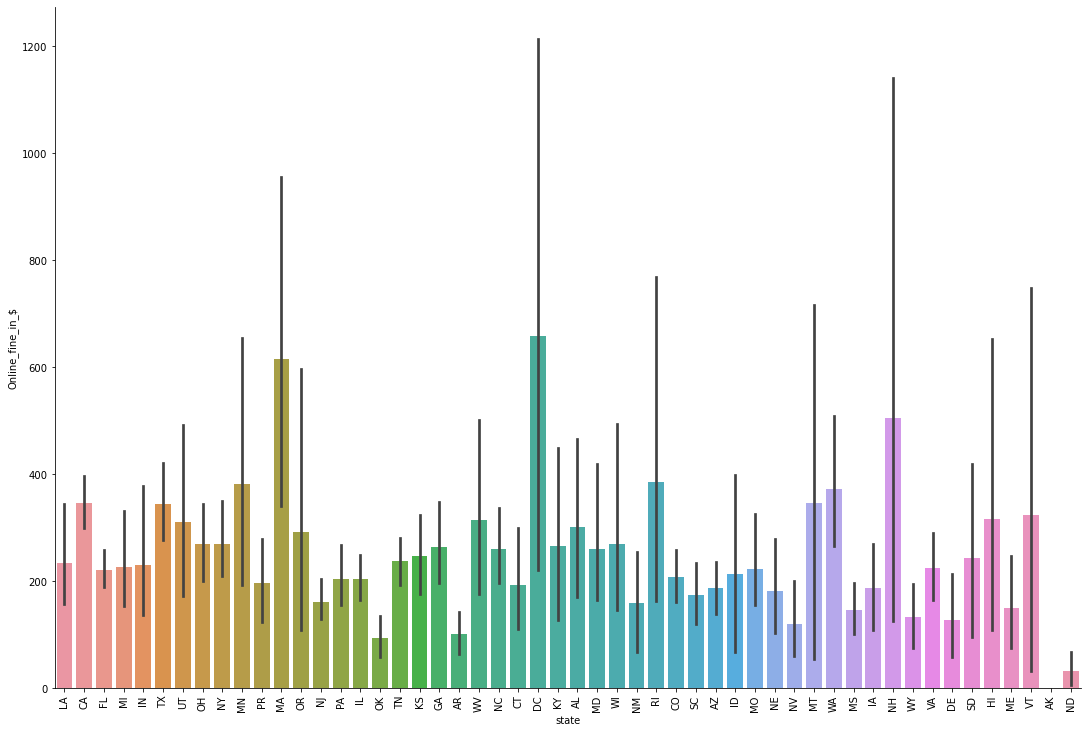

In [22]:
p4 = sns.catplot(x = 'state', y = 'Online_fine_in_$', data = fines, kind = 'bar', height=10, aspect=15/10)
p4.set_xticklabels(rotation=90)

#### Although in cases of Online fines DC leaves everyone behind but we can't say that it defy the trend of Total fines as both the MA and NH rank 2nd and 3rd in Online fines. And seems NH also shows the most variation.

### Cash fines per Category

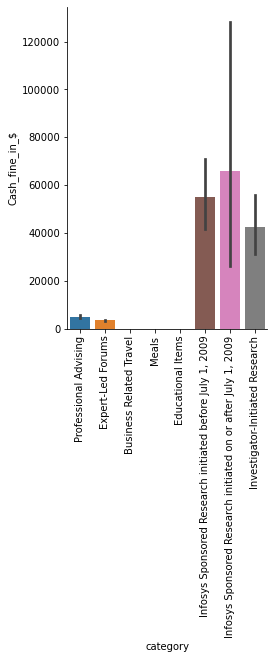

In [23]:
p5 = sns.catplot(x = 'category', y = 'Cash_fine_in_$', data = fines, kind = 'bar')
p5.set_xticklabels(rotation=90)

#### Not only the Cash fine follows the same trend as Total fine we can also observe that its magnitude is quite high as compared to Online fine and this makes it easy to understand why Total fine shows the trend it does.

### Cash fines per State

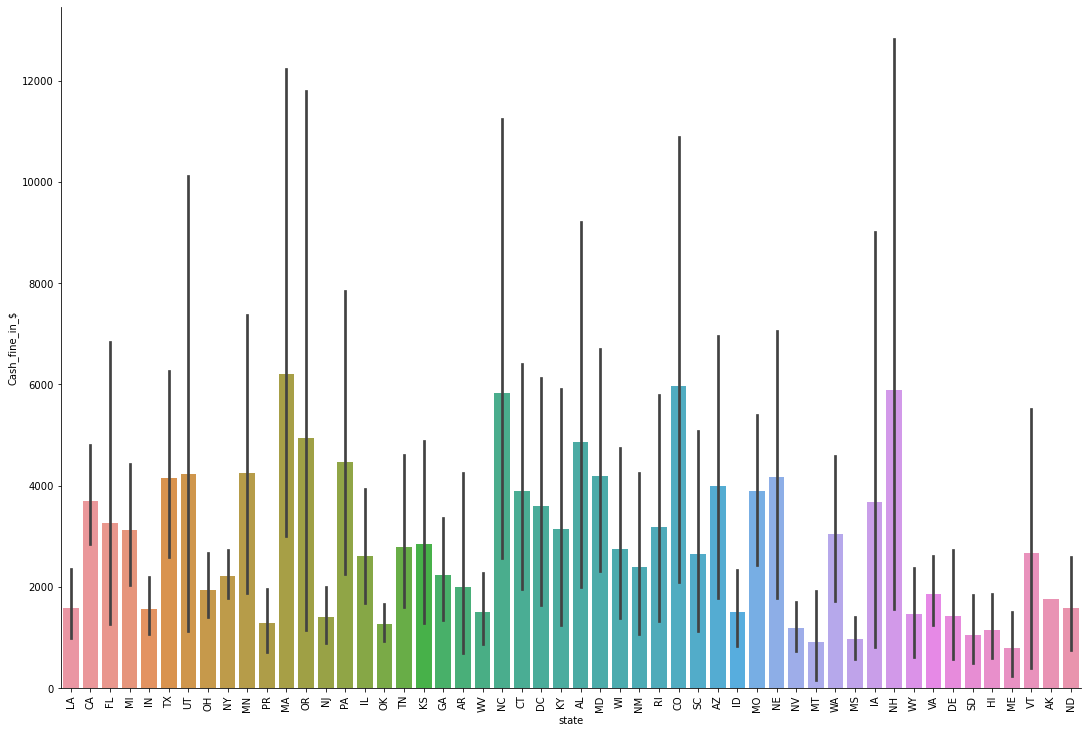

In [24]:
p6 = sns.catplot(x = 'state', y = 'Cash_fine_in_$', data = fines, kind = 'bar', height=10, aspect=15/10)
p6.set_xticklabels(rotation=90)

#### This also shows same trend as Total fine as MA takes the lead seconded by CO and 3rd position is taken by NH which inturn is quite closely followed by NC

### Vizualising task 2 

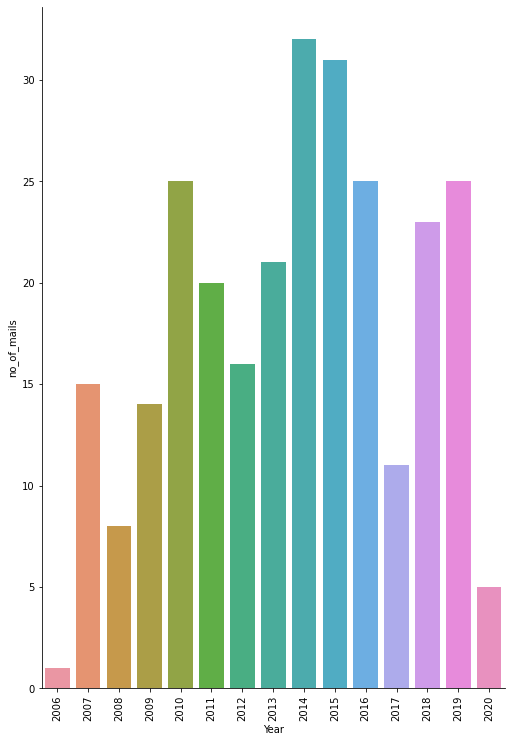

In [25]:
p7 = sns.catplot(x = 'Year', y = 'no_of_mails', data = op2, kind = 'bar', height=10, aspect=7/10)
p7.set_xticklabels(rotation=90)

#### Task 3 is not vizualized as it only have 4 entries out of which one is None rendering only 3 as useful

### Vizualising Task 4

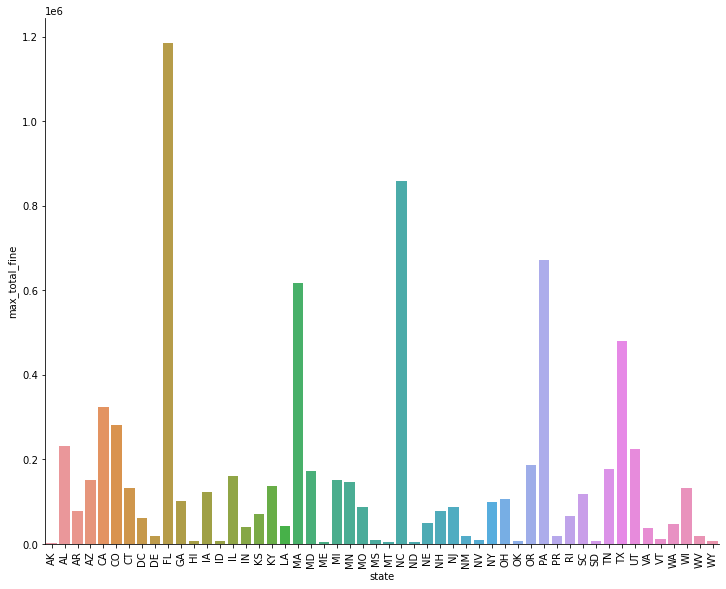

In [26]:
p8 = sns.catplot(x = 'state', y = 'max_total_fine', data = op4, kind = 'bar', height=8, aspect=10/8)
p8.set_xticklabels(rotation=90)

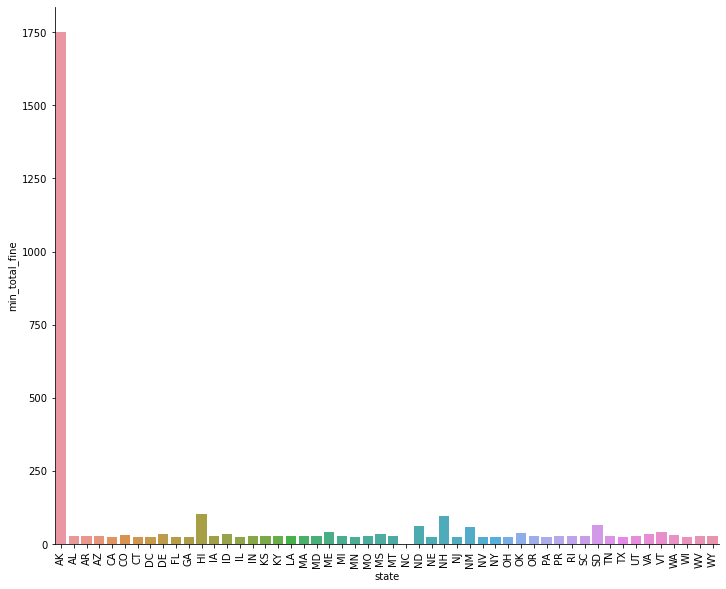

In [27]:
p9 = sns.catplot(x = 'state', y = 'min_total_fine', data = op4, kind = 'bar', height=8, aspect=10/8)
p9.set_xticklabels(rotation=90)

#### This gives us a full picture and also a better understanding of results as we do not like to read numeric degeits but vizuals attract out attention and also are far more easy to understand

#### Task 5 has been taken care of in above vizualization
#### Task 6 was not clear to me
#### Task 7 also has only 5 columns and the info is again redundant